<IPython.core.display.Javascript object>


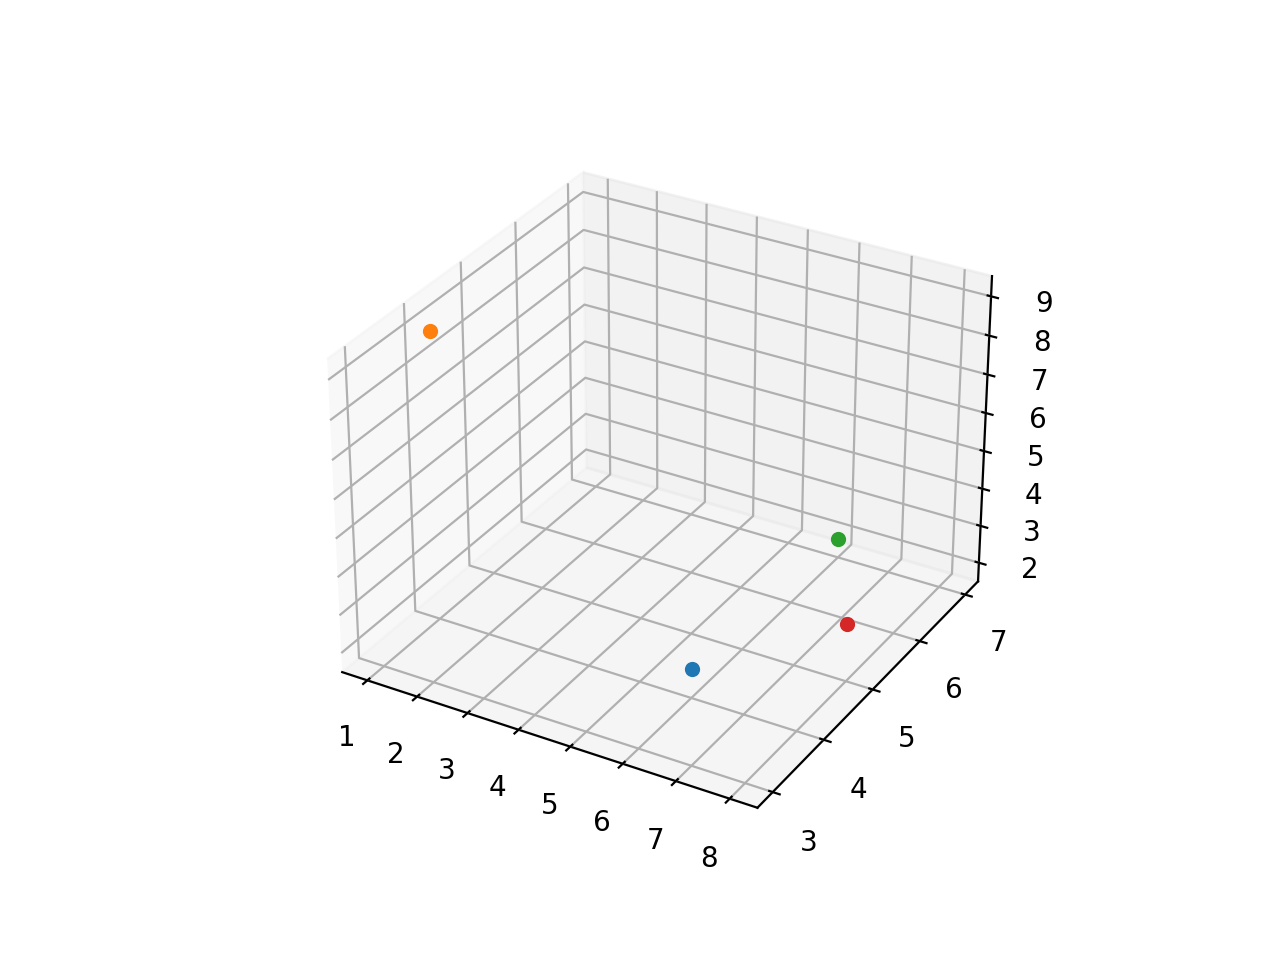


Расстояния между [7 3 4] и [1 4 9]:
Евклида 7.874007874011811
Квадрат Евклида 62.0
Хемминга 12.0
Чебышева 6.0

Расстояния между [7 3 4] и [6 7 2]:
Евклида 4.58257569495584
Квадрат Евклида 21.0
Хемминга 7.0
Чебышева 4.0

Расстояния между [7 3 4] и [8 5 3]:
Евклида 2.449489742783178
Квадрат Евклида 5.999999999999999
Хемминга 4.0
Чебышева 2.0

Расстояния между [1 4 9] и [6 7 2]:
Евклида 9.1104335791443
Квадрат Евклида 83.0
Хемминга 15.0
Чебышева 7.0

Расстояния между [1 4 9] и [8 5 3]:
Евклида 9.273618495495704
Квадрат Евклида 86.0
Хемминга 14.0
Чебышева 7.0

Расстояния между [6 7 2] и [8 5 3]:
Евклида 3.0
Квадрат Евклида 9.0
Хемминга 5.0
Чебышева 2.0


In [43]:
# 1.3.1
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib notebook
arr = np.array([[0, 0, 0]] * 4)
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
for i in range(4):
    for j in range(3):
        arr[i][j] = randint(0, 9)
    ax.scatter(arr[i][0], arr[i][1], arr[i][2])

for i in range(3):
    for j in range(i + 1, 4):
        print("\nРасстояния между ", arr[i], " и ", arr[j], ':', sep = '')
        print("Евклида", np.linalg.norm(arr[i] - arr[j]))
        print("Квадрат Евклида", np.linalg.norm(arr[i] - arr[j]) ** 2)
        print("Хемминга", np.linalg.norm(arr[i] - arr[j], ord = 1))
        print("Чебышева", np.linalg.norm(arr[i] - arr[j], ord = np.inf))

In [44]:
# 1.3.2
arr = np.zeros((5, 5))
arr += np.arange(5)
arr

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])

In [45]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

iris = sns.load_dataset("iris")

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<IPython.core.display.Javascript object>


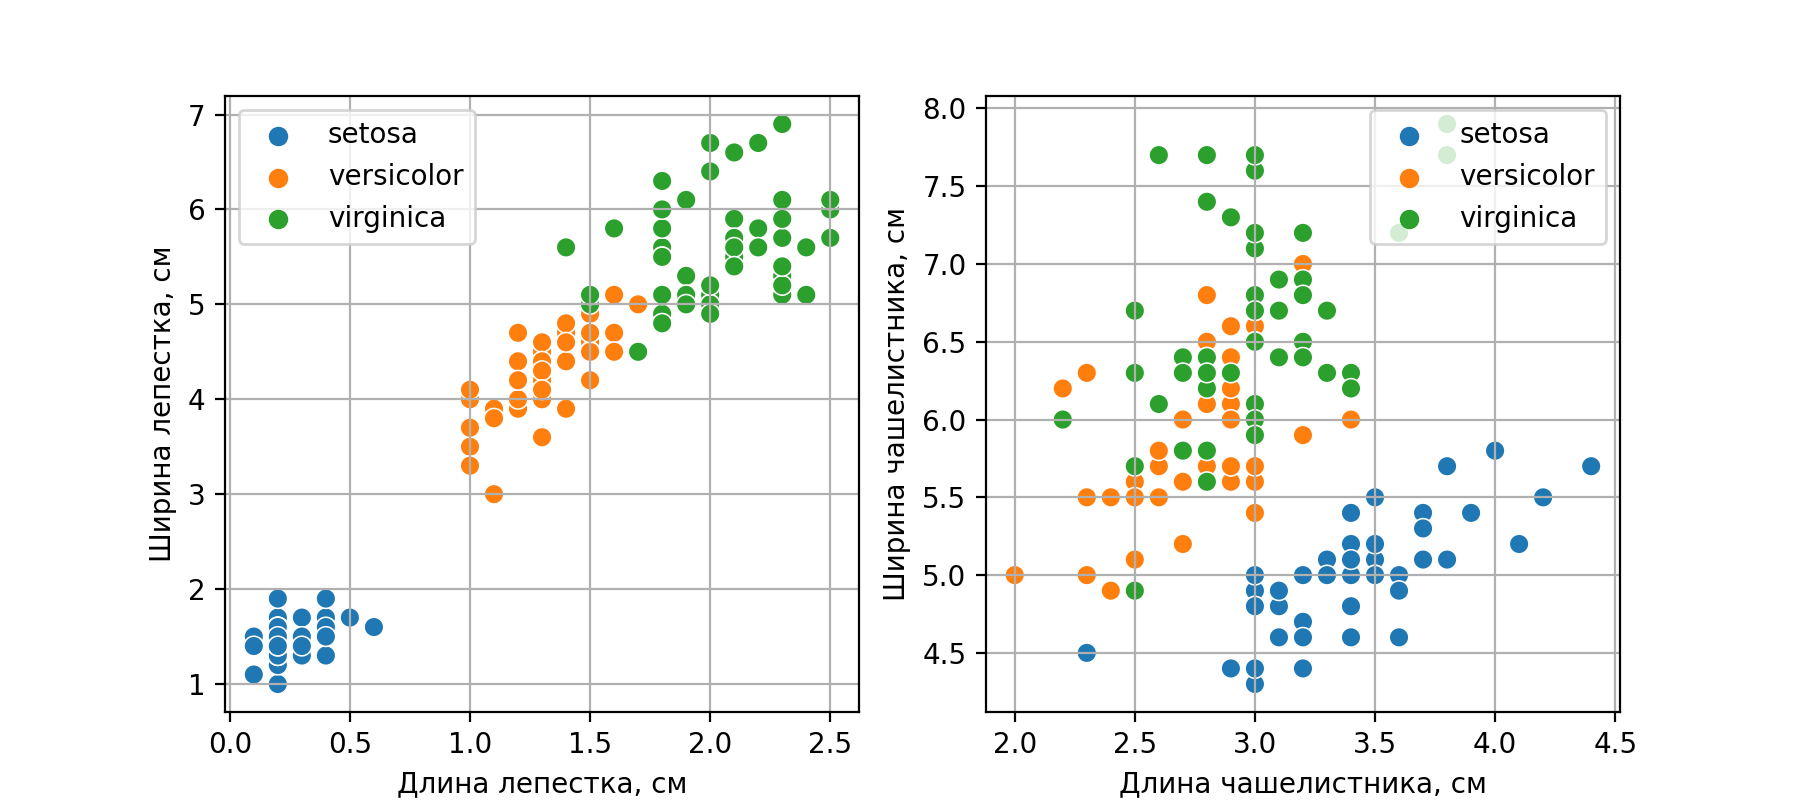

In [46]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
sns.scatterplot(
    data=iris,
    x='petal_width',
    y='petal_length',
    hue='species',
    s=50
)
plt.xlabel("Длина лепестка, см")
plt.ylabel("Ширина лепестка, см")
plt.legend()
plt.grid()

plt.subplot(122)
sns.scatterplot(
    data=iris,
    x="sepal_width",
    y="sepal_length",
    hue="species",
    s=50
)
plt.xlabel("Длина чашелистника, см")
plt.ylabel("Ширина чашелистника, см")
plt.legend()
plt.grid()

In [141]:
# 2.3.1
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((127, 4), (23, 4), (127,), (23,))

In [142]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

/Users/serjtankian/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['setosa', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'virginica', 'versicolor'], dtype=object)

<IPython.core.display.Javascript object>


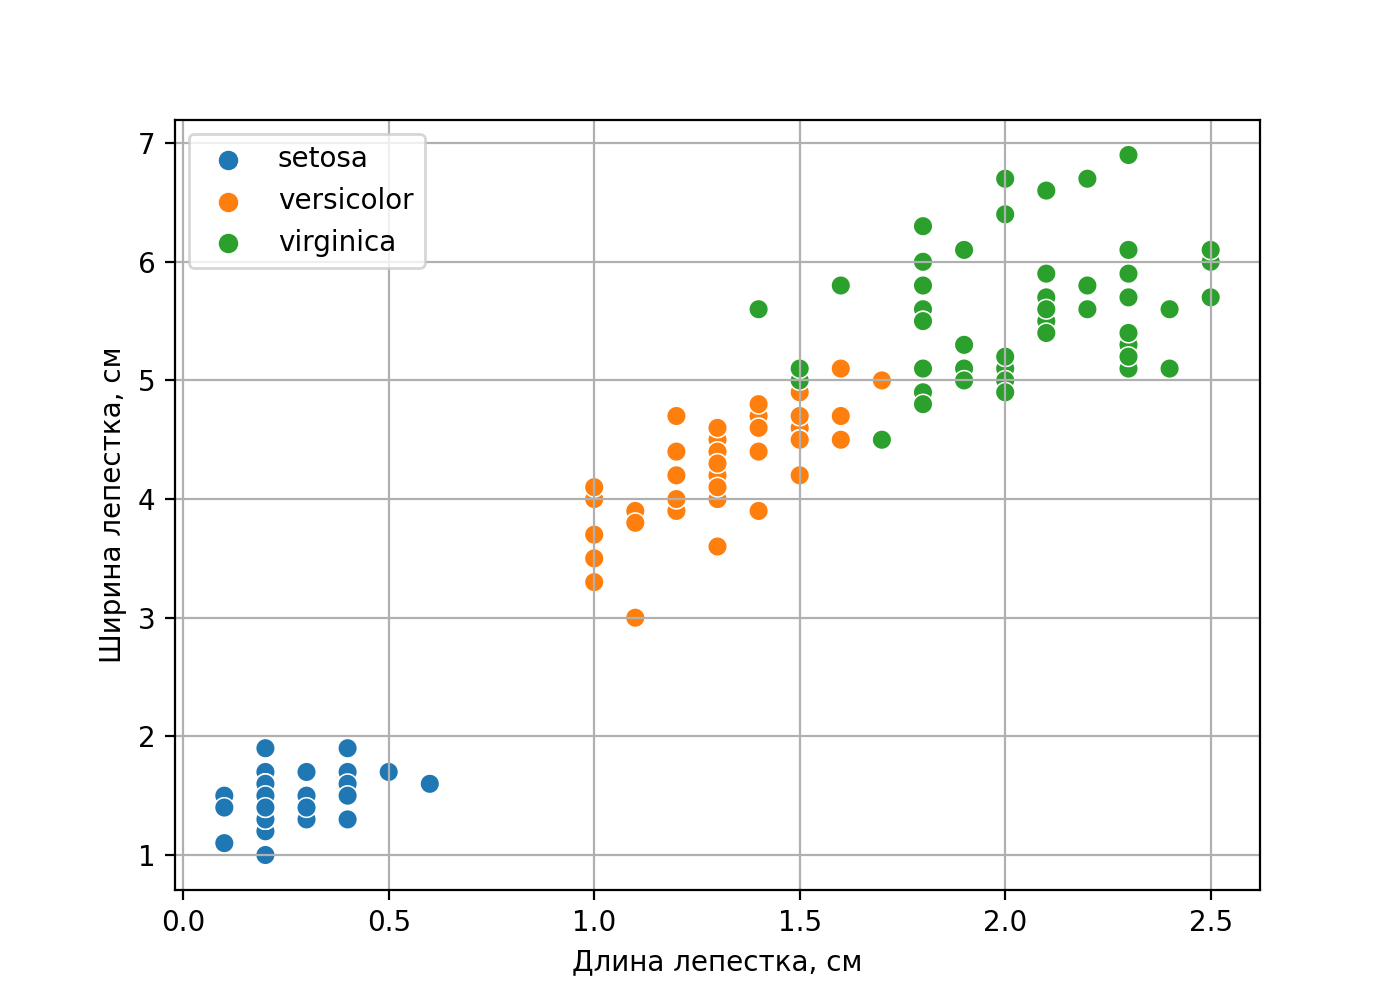

accuracy: 1.0


In [143]:
plt.figure(figsize = (7, 5))
sns.scatterplot(
    data=iris,
    x="petal_width",
    y="petal_length",
    hue="species",
    s=50
)
plt.xlabel("Длина лепестка, см")
plt.ylabel("Ширина лепестка, см")
plt.legend()
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(
            x_test.iloc[i, 3], 
            x_test.iloc[i, 2],
            color="red",
            s=70
        )

from sklearn.metrics import accuracy_score
print(f"accuracy: {accuracy_score(y_test, y_pred) :.3}")

In [151]:
# 3.3.2
from pandas import DataFrame
features = DataFrame({
    "eye_color" : ["blue",  "grey",  "brown", "brown", "grey"],
    "skin_color": ["white", "white", "black", "white", "black"]
})
eyecolormapper = {"blue" : 1, "grey" : 2, "brown" : 3}
skincolormapper = {"white" : 1, "black" : 2}
features["eye_color"] = features["eye_color"].replace(eyecolormapper)
features["skin_color"] = features["skin_color"].replace(skincolormapper)
features

,eye_color,skin_color
0,1,1
1,2,1
2,3,2
3,3,1
4,2,2
